#Libraries, Directory, and data

In [ ]:
#instal library
!pip install CausalInference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Directory
%cd /content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching

/content/drive/MyDrive/Business Analyst course/Econometrics and Causal Inference/Matching


In [ ]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from causalinference import CausalModel

In [ ]:
#Load the data
df=pd.read_csv("school.csv")
df=df.iloc[:,1:]
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753


#Data Analysis

In [ ]:
#Comparing groups averages
df.groupby('catholic').mean()

<ipython-input-5-27881efd59bf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('catholic').mean()


,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized
catholic,,,,,,,,,
0,1.106246,37.794621,40.134919,43.909495,42.590520,65393.928540,0.101578,0.045566,0.163128
1,1.073118,39.775269,42.007527,47.620871,45.908269,86180.625269,0.016129,0.006452,0.219685


In [ ]:
#T-test
group1=df.where(df.catholic==0).dropna()["income"]
group2=df.where(df.catholic==1).dropna()["income"]
stat, p=ss.ttest_ind(group1,group2)
print(p)

5.943636213205364e-41


In [ ]:
#What to Loop
continous=["number_places_lived", "mom_age","dad_age", "mom_score","dad_score","income"]
#Where to store result
stat={}
p={}
#Loop
for x in continous:
  group1=df.where(df.catholic==0).dropna()[x]
  group2=df.where(df.catholic==1).dropna()[x]
  stat[x], p[x]=ss.ttest_ind(group1,group2)
ttests= pd.DataFrame.from_dict(p,orient="Index")
ttests.columns=["pvalue"]
print(ttests)

                           pvalue
number_places_lived  7.072609e-03
mom_age              1.359492e-22
dad_age              3.344265e-16
mom_score            2.280116e-19
dad_score            5.489722e-18
income               5.943636e-41


In [ ]:
#Chi-Square Test
tab=pd.crosstab(index=df.poverty,
                columns=df.catholic)
statistic, p, dof, exp = ss.chi2_contingency(tab)
print(p)

6.511354893726035e-17


In [ ]:
#What to loop
categorical=["poverty","food_stamps"]

#where to store
statistic={}
p={}
dof={}
exp={}

#loop
for x in categorical:
  tab=pd.crosstab(index=df[x],
                columns=df.catholic)
  statistic[x], p[x], dof[x], exp[x] = ss.chi2_contingency(tab)
  chisquare=pd.DataFrame.from_dict(p,orient="Index")
  chisquare.columns=["pvalue"]
  print(chisquare)

               pvalue
poverty  6.511355e-17
                   pvalue
poverty      6.511355e-17
food_stamps  3.294153e-08


#Preparing for Matching

In [ ]:
temp=pd.get_dummies(df)
temp.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,...,dad_education_VOC/TECH PROGRAM,mom_education_8TH GRADE OR BELOW,mom_education_9TH - 12TH GRADE,mom_education_BACHELOR'S DEGREE,mom_education_DOCTORATE OR PROFESSIONAL DEGREE,mom_education_GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,mom_education_HIGH SCHOOL DIPLOMA/EQUIVALENT,"mom_education_MASTER'S DEGREE (MA, MS)",mom_education_SOME COLLEGE,mom_education_VOC/TECH PROGRAM
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Check how many per race
df.race.value_counts()

WHITE, NON-HISPANIC                        3654
HISPANIC, RACE NOT SPECIFIED                408
HISPANIC, RACE SPECIFIED                    387
BLACK OR AFRICAN AMERICAN, NON-HISPANIC     357
ASIAN                                       342
MORE THAN ONE RACE, NON HISPANIC            123
NATIVE HAWAIIAN, OTHER PACIFIC ISLANDER      93
AMERICAN INDIAN OR ALASKA NATIVE             62
NOT ASCERTAINED                               3
Name: race, dtype: int64

In [ ]:
#preparing race variable
df["race_asian"]=np.where(df.race=='ASIAN',1,0)
df["race_white"]=np.where(df.race=='WHITE, NON-HISPANIC',1,0)
df["race_black"]=np.where(df.race=='BLACK OR AFRICAN AMERICAN, NON-HISPANIC',1,0)
df["race_hispanic"]=np.where((df.race=='HISPANIC, RACE NOT SPECIFIED')|(df.race=='HISPANIC, RACE SPECIFIED'),1,0)
df.head()

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.50,77.5,62500.5,0,0,0.981753,0,1,0,0
1,0,"WHITE, NON-HISPANIC",1,41,48,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,34.95,53.5,45000.5,0,0,0.594378,0,1,0,0
2,0,"WHITE, NON-HISPANIC",1,43,55,"MASTER'S DEGREE (MA, MS)",GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,63.43,53.5,62500.5,0,0,0.490611,0,1,0,0
3,1,"WHITE, NON-HISPANIC",1,38,39,BACHELOR'S DEGREE,GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE,53.50,53.5,87500.5,0,0,1.451278,0,1,0,0
4,0,"WHITE, NON-HISPANIC",1,47,57,DOCTORATE OR PROFESSIONAL DEGREE,"MASTER'S DEGREE (MA, MS)",61.56,77.5,150000.5,0,0,2.595699,0,1,0,0


In [ ]:
#Preparing Education variable
df.dad_education.value_counts()

HIGH SCHOOL DIPLOMA/EQUIVALENT            1524
SOME COLLEGE                              1344
BACHELOR'S DEGREE                         1026
9TH - 12TH GRADE                           355
MASTER'S DEGREE (MA, MS)                   354
VOC/TECH PROGRAM                           306
DOCTORATE OR PROFESSIONAL DEGREE           224
8TH GRADE OR BELOW                         167
GRADUATE/PROFESSIONAL SCHOOL-NO DEGREE     129
Name: dad_education, dtype: int64

In [ ]:
#Transforming education variable
df["dad_higher_education"]=np.where((df.dad_education=="BACHELOR'S DEGREE")|
 (df.dad_education=="DOCTORATE OR PROFESSIONAL DEGREE")|
  (df.dad_education=="MASTER'S DEGREE (MA, MS)"),1,0)
df["mom_higher_education"]=np.where((df.mom_education=="BACHELOR'S DEGREE")|
 (df.mom_education=="DOCTORATE OR PROFESSIONAL DEGREE")|
  (df.mom_education=="MASTER'S DEGREE (MA, MS)"),1,0)
df.head(1)

,catholic,race,number_places_lived,mom_age,dad_age,dad_education,mom_education,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,"WHITE, NON-HISPANIC",1,47,45,DOCTORATE OR PROFESSIONAL DEGREE,SOME COLLEGE,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [ ]:
#Cleaning dataset
df=df.drop(columns=["race", "dad_education","mom_education"])
df.head(1)

,catholic,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,score_standardized,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
0,0,1,47,45,53.5,77.5,62500.5,0,0,0.981753,0,1,0,0,1,0


In [ ]:
#Isolate y, treatment and confounders
treat=df.catholic.values
y=df.score_standardized.values
confounders=df.drop(columns=["catholic","score_standardized"]).values

#Common Support region

In [ ]:
#Logistic regression
import statsmodels.api as sm
confounders_csr=sm.add_constant(confounders)
csr_model=sm.Logit(treat, confounders_csr).fit()
print(csr_model.summary())

Optimization terminated successfully.
         Current function value: 0.430983
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5429
Model:                          Logit   Df Residuals:                     5414
Method:                           MLE   Df Model:                           14
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                 0.05888
Time:                        13:24:16   Log-Likelihood:                -2339.8
converged:                       True   LL-Null:                       -2486.2
Covariance Type:            nonrobust   LLR p-value:                 3.835e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3412      0.418    -10.380      0.000      -5.161      -3.521
x1            -0.1666      0.

In [ ]:
#Checking correlations in the confounders group
df.drop(columns=["catholic","score_standardized"]).corr()

,number_places_lived,mom_age,dad_age,mom_score,dad_score,income,poverty,food_stamps,race_asian,race_white,race_black,race_hispanic,dad_higher_education,mom_higher_education
number_places_lived,1.000000,-0.105116,-0.096571,-0.042976,-0.033342,-0.039007,0.058450,0.063574,0.030205,-0.030456,-0.004143,0.016853,-0.022836,-0.045230
mom_age,-0.105116,1.000000,0.741862,0.224808,0.237727,0.276373,-0.134362,-0.106739,0.052270,0.098262,-0.060004,-0.116422,0.265912,0.281417
dad_age,-0.096571,0.741862,1.000000,0.179047,0.197057,0.222995,-0.100600,-0.083560,0.085816,0.063543,-0.039396,-0.108158,0.247213,0.213065
mom_score,-0.042976,0.224808,0.179047,1.000000,0.309380,0.361271,-0.190873,-0.111281,-0.015435,0.155196,-0.033081,-0.158292,0.324952,0.458104
dad_score,-0.033342,0.237727,0.197057,0.309380,1.000000,0.406067,-0.172984,-0.113052,0.029000,0.144808,-0.075754,-0.147734,0.467236,0.321471
income,-0.039007,0.276373,0.222995,0.361271,0.406067,1.000000,-0.369395,-0.214107,-0.005106,0.247893,-0.119058,-0.199047,0.440927,0.397905
poverty,0.058450,-0.134362,-0.100600,-0.190873,-0.172984,-0.369395,1.000000,0.387830,0.046462,-0.267137,0.092218,0.217985,-0.168300,-0.157597
food_stamps,0.063574,-0.106739,-0.083560,-0.111281,-0.113052,-0.214107,0.387830,1.000000,-0.005068,-0.150369,0.108143,0.078449,-0.105153,-0.105883
race_asian,0.030205,0.052270,0.085816,-0.015435,0.029000,-0.005106,0.046462,-0.005068,1.000000,-0.372021,-0.068790,-0.107396,0.089660,0.075650
race_white,-0.030456,0.098262,0.063543,0.155196,0.144808,0.247893,-0.267137,-0.150369,-0.372021,1.000000,-0.380653,-0.594279,0.105363,0.130682


In [ ]:
#Predictions
probabilities=csr_model.predict(confounders_csr)
probabilities

array([0.26041384, 0.17273291, 0.24596599, ..., 0.23182116, 0.12192314,
       0.1825144 ])

In [ ]:
#Create dataframe with probablities and being treated or not
df_prob = np.vstack([treat, probabilities])
df_prob = np.transpose(df_prob)
df_prob

array([[0.        , 0.26041384],
       [0.        , 0.17273291],
       [0.        , 0.24596599],
       ...,
       [0.        , 0.23182116],
       [0.        , 0.12192314],
       [0.        , 0.1825144 ]])

In [ ]:
#Split between treated and non-treated
non_treated=df_prob[:,0]==0
non_treated=df_prob[non_treated]
non_treated=non_treated[:,1]

treated=df_prob[:,0]==1
treated=df_prob[treated]
treated=treated[:,1]

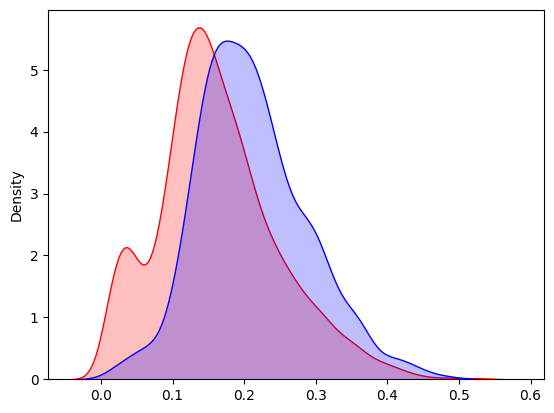

In [ ]:
#Common support region
plot_non_treated=sns.kdeplot(non_treated, fill=True, color='r')
plot_treated = sns.kdeplot(treated, fill=True, color='b')

#Matching

In [ ]:
#Matching Model
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.133      0.065     -2.044      0.041     -0.260     -0.005
           ATC     -0.126      0.073     -1.737      0.082     -0.268      0.016
           ATT     -0.167      0.060     -2.786      0.005     -0.284     -0.049



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef


#Robustness: Repeated experiments


In [ ]:
#How to get results
model.estimates['matching']['ate']

-0.13297192873363323

In [ ]:
#Prepare for the loop
ate={}
i=0
#Start the loop
while i<1000:
  #Sample
  sample=df.sample(1000)
  #Matching preparation
  treat=sample.catholic.values
  confounders=sample.drop(columns=["catholic", "score_standardized"]).values
  y=sample.score_standardized.values
  #Matching
  model = CausalModel(y, treat, confounders)
  model.est_via_matching(bias_adj=True)
  #Store the results
  ate[i]=model.estimates['matching']['ate']
  i=i+1
  print(i)

Axes(0.125,0.11;0.775x0.77)
-0.14167005766358715


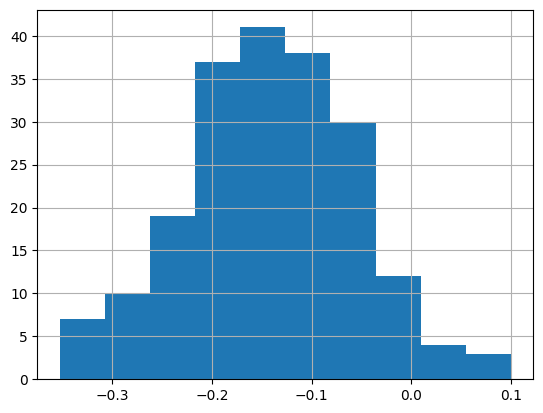

In [ ]:
#Visualization
ate=pd.Series(ate)
print(ate.hist())
print(ate.mean())

#Robustness Check - Removing 1 confounder

In [ ]:
#New confounder list
confounders = df.drop(columns=['catholic','score_standardized','income']).values

In [ ]:
#Matching
model = CausalModel(y, treat, confounders)
model.est_via_matching(bias_adj=True)
print(model.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.167      0.131     -1.278      0.201     -0.423      0.089
           ATC     -0.184      0.140     -1.314      0.189     -0.460      0.091
           ATT     -0.080      0.141     -0.566      0.571     -0.356      0.196



/usr/local/lib/python3.10/dist-packages/causalinference/estimators/matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef
